In [1]:
from minisom import MiniSom

In [2]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt

MiniSom relies on the python ecosystem to import and preprocess data. 

In [3]:
columns = ['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=columns, 
                   sep='\t+', engine='python')

In [4]:
target = data['target'].values

In [5]:
label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}

In [6]:
data = data[data.columns[:-1]]

In [7]:
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

In [9]:
data.shape

(210, 7)

Initialize and train MiniSom as follows:

In [10]:
# initializing and training
n_neurons = 9
m_neurons = 9

som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=0.5, neighborhood_function = 'gaussian',
              random_seed=0,topology='rectangular') # topology can also be hexagonal - to capture more complex spatial r/os. 


MiniSom provides 2 primary methods for weight initialization:
- random_weights_init and pca_weights_init
Random Weights Init: Initializes the SOM weights by randomly sampling values from the input dataset or generating random values within the range of the data's features. For each neuron, the weights are set to random values drawn uniformly from the range [min(data),max(data)] for each feature, or by directly sampling random data points from the input dataset. 
Significance: Pros: - Simple and ensures weights are distributed across the data range, providing a broad starting point for training. Robust. Cons: Leads to slower convergence. Usage: som.random_weights_init(data)
- pca_weights_init(data): Initializes the SOM weights using Principal Component Analysis (PCA). Weights are set along the directions of the first 2 principal components of the data, scaled to cover the data's variance. Compute the first 2 principal components and initialize the neuron weights as linear combinations of these components. 
Pros - faster convergence and better organized maps. 


In [11]:
som.pca_weights_init(data)
som.train(data,1000,verbose=False)

c:\Users\blais\Documents\ML\venv2\lib\site-packages\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


To visualise the result of the training, we can plot the distance map, u-matrix using a pesudocolor where the neurons are displayed as an array and the color represents the weights distance from the neighbor neuron. On top of this pseudocolor we add markers that represent the samples mapped in specidied cells.

We're using the som.distance_map
- outputs a 2D array of shape (x,y) - where x and y are the dimensions of the SOM grid
- each element of the array represents the average distance between the weight vector of a neuron and the weight vectors of its immediate neighbors on the SOM grid. The values are typically normalised to the range [0,1] where:
    - Low values close to 0 indicate neurons whose weights are similar to their neighbors
    - High values close to 1 - indicate neurons whose weights differ significantly from their neighbors. 


In [16]:
distance_map = som.distance_map()

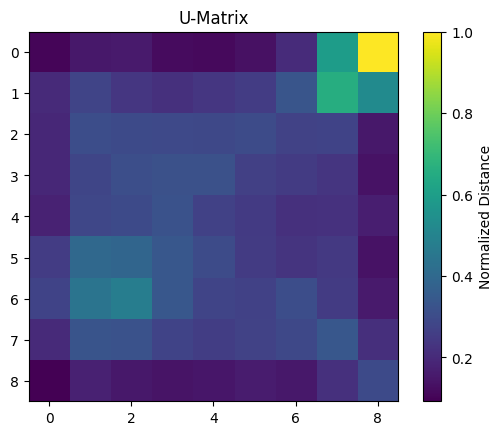

In [19]:
plt.imshow(distance_map, cmap='viridis')
plt.colorbar(label='Normalized Distance')
plt.title('U-Matrix')
plt.show()

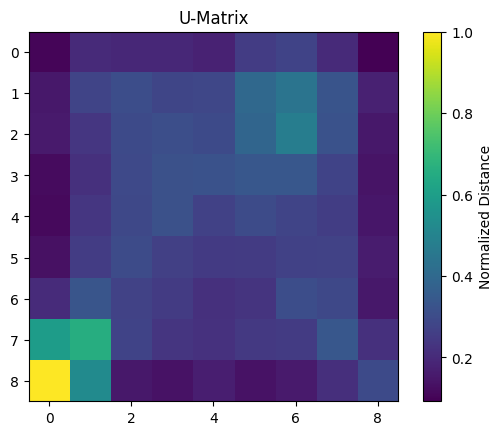

In [18]:
plt.imshow(distance_map.T, cmap='viridis')
plt.colorbar(label='Normalized Distance')
plt.title('U-Matrix')
plt.show()

In [26]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

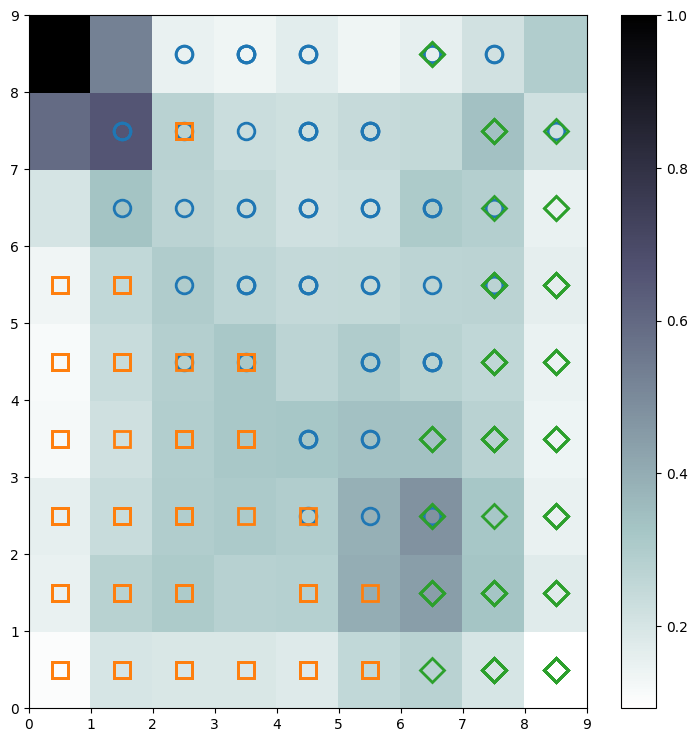

In [36]:
plt.figure(figsize=(9,9))

plt.pcolor(som.distance_map().T, cmap='bone_r') # plotting the distance map as background.
plt.colorbar()

markers = ['o','s','D']
colors = ['C0','C1','C2']

for cnt, xx in enumerate(data):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plt.plot(w[0]+0.5,w[1]+0.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12,
             markeredgewidth=2)
plt.show()

In [37]:
som.activation_response(data)

array([[4., 3., 5., 2., 5., 2., 0., 0., 0.],
       [3., 2., 3., 1., 4., 2., 1., 3., 0.],
       [4., 2., 4., 3., 2., 1., 1., 3., 2.],
       [2., 0., 1., 2., 3., 3., 2., 1., 4.],
       [4., 2., 2., 3., 0., 4., 3., 4., 3.],
       [3., 1., 1., 2., 3., 2., 3., 4., 0.],
       [1., 3., 3., 3., 4., 1., 3., 0., 4.],
       [6., 4., 1., 5., 4., 5., 2., 3., 2.],
       [7., 4., 4., 4., 4., 5., 2., 2., 0.]])

In [14]:
som.distance_map().shape

(9, 9)

In [15]:
som.distance_map()

array([[0.10556147, 0.14940734, 0.15827866, 0.11848575, 0.11392538,
        0.13188442, 0.20452137, 0.59381554, 1.        ],
       [0.19965427, 0.2768722 , 0.23641472, 0.21935876, 0.23399205,
        0.25507463, 0.33195714, 0.65855253, 0.52549253],
       [0.19376603, 0.30833381, 0.29457913, 0.29225913, 0.28815256,
        0.29993166, 0.27045583, 0.27410172, 0.14904447],
       [0.19469887, 0.28283092, 0.30943893, 0.318997  , 0.31829877,
        0.26395492, 0.24928374, 0.232678  , 0.13563751],
       [0.18042666, 0.2844757 , 0.29739674, 0.32116059, 0.26710271,
        0.24473274, 0.21715326, 0.22125649, 0.16877681],
       [0.25398519, 0.3999606 , 0.38673078, 0.33937037, 0.29916997,
        0.25125117, 0.22848845, 0.2438878 , 0.13615495],
       [0.27414928, 0.44117541, 0.47678976, 0.33726471, 0.27907165,
        0.26595595, 0.30816356, 0.24956138, 0.15593171],
       [0.1987249 , 0.32627713, 0.32203072, 0.27610126, 0.25799404,
        0.2717342 , 0.28717254, 0.33851156, 0.21526043],


Credit: https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb